Decision Tree란 무엇인가?
* 의사결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 작은 집단으로 나누어서 분석하는 기법이다.
SVM 처럼 결정트리(decision tree)는 분류 및 회귀가 가능한 머신러닝 알고리즘이다.
* 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘
* 최근에 많이 사용하는 랜덤 포레스트의 기본 구성 요소이다.
* 그래디언트 부스팅 랜덤포레스트를 배울 예정인데 그래디언트 부스팅중 light gbm의 기반이 결정트리로 되어있음 
* 추후 catboost XGBoost 등도 학습할 예정

Decision Tree 학습과 시각화
* 결정 트리의 이해를 돕기 위해서, 지난 시간에 배운 iris예제를 가지고 모델을 학습시켜서 시각화  

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call
 

DecisionTreeClassifier(max_depth=3)

결정트리는 시각화가 쉽고 학습한 모형의 시각화가 쉬워 해석력이 좋음 

0

## Decision Tree 예측하기
### 용어 정리
- Root Node(루트 노드) : 깊이가 0인 꼭대기 노드
- Leaf Node(리프 노드) : 자식 노드가 없는 마지막 노드
- Gini Impurity(지니 불순도) : 한 노드의 모든 샘플이 같은 클래스에 속해있으면, 해당 노드는 순수(gini=0)하다고 한다.

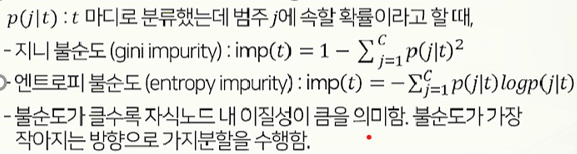

## 지니불순도를 계산해보자
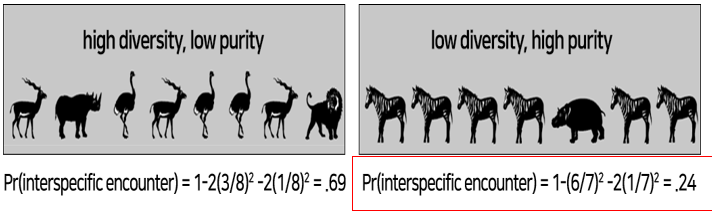



1. 첫번째로 root node(꼭대기)에서 시작한다.
2. petal width가 0.8과 같거나 작은지 검사한다.(조건에 따라 좌우 분기)
3. 만약 False라면 오른쪽으로 이동해 root node에서 했던 조건 검사를 실시하여 반복하여 분기한다.
4. 마지막에 leaf node(끝)에 도달했을 때, 추가적인 조건 검사 없이 가장 많은 클래스의 비중을 차지하고 있는 곳으로 클래스를 예측하게 된다.
* 결정 트리의 장점 : 스케일이나 평균을 원점에 맞추는 것과 같은 데이터 전처리가 거의 필요하지 않다.
* 특성변수가 분류형이 많을 경우 결정트리를 시도해 보는 것이 좋음
* 사이킷런은 이진 트리(자식 노드의 수가 2개 이하)만 만드는 CART 알고리즘을 사용한다.
* 결정 트리는 위와 같이 매우 직관적이고 이해하기 쉽고, 해석력이 아주 좋다. (이러한 모델을 '화이트 박스'라고 부른다')
* 반대로 다음 시간에 할 랜덤 포레스트와 신경망은 '블랙 박스'인데, 성능은 뛰어나지만 해석력이 떨어집니다.
* 그래서 상황(데이터 종류, 모델 적용할 비즈니스 모델, 환경 등등)을 고려해서 모델선택을 하여야 한다.

## Decision Tree 클래스 확률 추정
* 결정 트리도 한 샘플이 특정 클래스에 속할 확률을 추정토록 할 수 있다.
* 위 과정처럼 어떤 샘플이 각 조건에 따라서 리프 노드로 분기를 하고, 해당 노드에 클래스 비율이 곧 클래스 확률이 된다.

CART 훈련 알고리즘
* 위에서 말한대로 사이킷런의 결정트리 훈련 방식은 CART(Classification And Regression Tree) 알고리즘을 사용한다.

* CART 알고리즘 아이디어
 1. 훈련 세트 중 하나의 특성과 거기에 대한 임계값을 정한다. ex) "Petal width < 2.6"
 2. 특성과 임계값을 고를 때는 가장 순수한(pure) 서브셋으로 나눌 수 있는 짝을 찾는다.
 3. 비용함수(loss function)은 다음과 같다.
 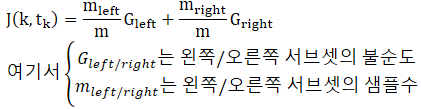
  4. 훈련 세트를 순수하게 잘 나눴다면 위 방식을 반복적으로 지정한 max_depth만큼 서브셋으로 나눈다

 * CART 알고리즘은 root node에서부터 최적의 분기를 찾으면서 최대한 불순도를 낮추려고 하는 greedy algorithm(탐욕적 알고리즘)이다.
  *     다르게 말하면, 미래를 생각하지 않고 각 단계에서 가장 최선의 선택을 하는 기법이다. 이렇게 각 단계에서 최선의 선택을 한 것이 전체적으로도 최선이길 바라는 알고리즘, 하지만 종종 충분히 훌륭한 모델을 찾곤 한다.

계산 복잡도
* decision tree를 학습시키기 위해서는 root node ~ leaf node까지 탐색을 해야 한다.
* 일반적으로 결정 트리는 평행하게 가지 분기를 하기 때문에, 모든 결정트리를 탐색하기 위해서는 약 log(m)/log(2) 만큼의 노드를 거쳐야한다.
* 각 노드의 한 개의 특성값만 확인하기 때문에, 예측에 필요한 전체 복잡도는 특성 수와 무관하게 log(m)/log(2)이다.
* 곧, 훈련 세트가 매우 클 경우에도 예측 속도가 아주 빠르다는 것을 알 수 있다.
* 그러나.. 훈련 알고리즘의 경우에는 각 노드에서 모든 훈련 샘플의 모든(max feature 이하) 특성을 비교한다.
* 그래서 훈련 복잡도는 n X m X log(m)이 된다.
* 그리고 훈련 세트가 (수천개 이하)만큼 작은 경우에는 DecisionTreeClassifier(~ ~ ~, presort = True)를 하게 되면 미리 데이터를 정렬하여 훈련 속도를 높일 수 있다.
  * - presort : (기본값 = False) 피팅에서 최상의 분할을 찾는 속도를 높이기 위해 데이터를 사전 정렬할지 여부이다. 대규모 데이터 세트에 대한 의사 결정 트리의 기본 설정의 경우이를 true로 설정하면 훈련 프로세스가 느려질 수 있지만, 더 작은 데이터 세트 또는 제한된 깊이를 사용하면 훈련 속도가 빨라질 수 있습니다.

지니 불순도 또는 엔트로피
* Decision Tree Classifier의 criterion : 기본값 "gini"이고, Decision Tree Regressor의 criterion : 기본값 "mse" 를 사용한다.
* 만약에 criterion 매겨변수를 열역학 개념에서 많이 사용하는 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있다. -> 머신러닝의 불순도 측정 방법으로 많이 사용된다.
* 만약, 한 노드가 한 클래스의 샘플만 가지고 있다면 엔트로피 역시 "0" 이 된다.
" 그렇다면 지니 불순도와 엔트로피 중 어떤 것을 사용해야 하나? " 답은 실제로 차이가 별로 없다이다.
* 지니 불순도의 경우가 약간 계산이 빠르다는 이유로 default값으로 많이 사용된다.
* 하지만 지니 불순도의 경우에는 빈도가 높은 클래스를 한쪽 가지로 고립시키는 경향이 있고, 엔트로피의 경우에는 조금 더 평형을 유지 하는 트리를 만드는 경향을 보인다.

## 규제 매개변수
* 결정 트리의 경우 훈련 데이터에 대한 가정을 보통 두지 않는다. (<=>선형 모델의 경우에는 데이터가 선형일거라 가정)
* 하지만 훈련 데이터에 대한 일반적인 가정을 두지 않는다면, 모델 자체가 훈련 데이터와 아주 가깝게 만들려고 해서 과접합이 발생할 수 있다.
* 결정 트리 모델의 경우에는 일반적인 선형 모델과 같이 파라미터 모델이 아니다.
* 결정 트리 모델은 훈련되기 전에 파라미터의 수를 지정할 수 없는 비파라미터 모델(nonparametric model)이다.
* 비파라미터 모델은 훈련 데이터에 맞춰지기 때문에 모델 구조가 고정되지 않고 자유롭다.
* 파라미터 모델은 미리 파라미터를 정할 수 있기 때문에 제한적이지만 과대적합의 위험을 조절할 수 있다.
* 결정 트리는 보통 최대 깊이(max_depth)로 모델의 과적합을 규제할 수 있다.
* max_depth가 낮아지면 과대적합의 위험이 감소될 수 있다.
* 결정 트리의 규제 매개변수 종류
1. max_depth : 트리 최대 깊이
    - max_depth 감소 => 모델 규제 증가 => 과적합 감소
2. min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
    - min_samples_split 증가 => 모델 규제 증가 => 과적합 감소
3. min_samples_leaf : leaf node가 가지고 있어야할 최소 샘플 수
    - min_samples_leaf 증가 => 모델 규제 증가 => 과적합 감소
4. min_weight_fraction_leaf : min_samples_leaf와 비슷하지만, 가중치가 부여된 전체 샘플 수에서의 비율 
    - min_weight_fraction_leaf 증가 => 모델 규제 증가 => 과적합 감소
5. max_leaf_nodes : leaf node의 총 최대 개수
    - max_leaf_nodes 감소 => 모델 규제 증가 => 과적합 감소
6. max_features : 최상의 분할을 찾을 때 고려할 기능의 수
    - max_features 감소 => 모델 규제 증가 => 과적합 감소
        - TIP : min_으로 시작하는 매개변수 증가 => 모델 규제 증가 => 과적합 감소
        - TIP : max_으로 시작하는 매개변수 감소 => 모델 규제 증가 => 과적합 감소

# Decision Tree를 활용한 회귀
* decision tree(결정 트리)를 활용하여 회귀문제 또한 해결할 수 있다.

* 앞에서 classification 했을 때와 거의 비슷한 형태의 그림을 가지게 된다.
* 차이점이라고는 클래스를 예측하는 것이 아니라, 특정 연속적인 value값을 예측한다는 것이다.
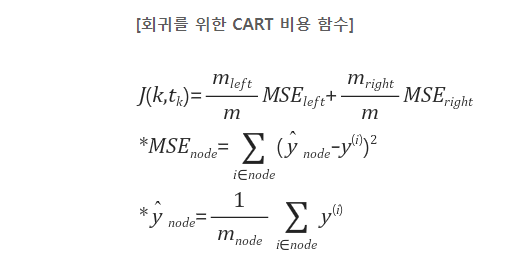

* classification에서 CART알고리즘은 훈련 세트의 불순도를 줄이는 방향으로 학습하지만, 회귀에서는 형태는 비슷하게 불순도 대신 MSE를 기본값으로 사용한다.
* 만약 max_depth를 정해주지 않으면 너무 많은 분기를 해서 훈련데이터는 매우 높은 성능으로 나오지만 새데이터를 넣게되면 잘 맞지 않는 과적합이 일어나며 이는 일반화를 하기에 큰 문제가 생김

# Decision Tree의 불안정성
* Decision Tree(결정 트리)는 이해 및 해석이 용이하면서 예측속도가 아주 빠르고 성능도 좋다.

* 하지만 결정트리는 계단 모양의 Decision Boundary(결정 경계)를 만들기 때문에 훈련 세트의 회전에 아주 민감하다.


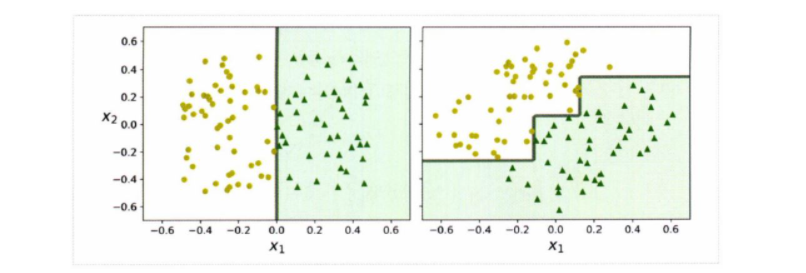

* 왼쪽의 그림의 경우에는 결정트리로 쉽게 classification을 할 수 있다.

* 하지만 왼쪽의 그림을 오른쪽 그림처럼 회전을 시키게 된다면, 결정트리는 복잡하게 형성이 된다.

* 만약 오른쪽의 그림을 새로운 데이터로 예측한다면 일반화되기란 어려울 것이다.

* 그래서 위와 같은 문제를 해결하기 위해서, PCA(Principal Component Analysis)방법을 사용할 수 있다.

* 다음장에서 볼 랜덤 포레스트는 많은 트리의 예측들을 평균내어서 위에서 언급한 불안정성들을 어느정도 극복할 수 있다.
